<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

---

# Final Project 4

## Perkenalan

Faradilla Ardiyani | PYTN-KS02-005 | Studi Independen - Kampus Merdeka

### Latar Belakang

Gempa bumi merupakan salah satu bencana yang paling sering terjadi di Indonesia. Salah satu daerah di Indonesia yang rawan terjadi bencana gempa bumi adalah Pulau Sumatera. Sebagai upaya mitigasi bencana, perlu dilakukan upaya pengelompokan daerah rawan bencana gempa bumi, salah satu upaya yaitu melakukan clustering. Hal ini diharapkan mampu membantu pemerintah dalam upaya mitigasi bencana gempa yang terjadi.

### Dataset

Dataset yang digunakan adalah data gempa bumi di Pulau Sumatera tahun 1973-2021 yang bersumber dari usgs (https://earthquake.usgs.gov/earthquakes/search/). 

Dataset ini berisi histori gempa bumi selama 48 tahun dari berbagai lokasi di Pulau Sumatera yang terdiri dari 895 baris dan 22 atribut.

### Objective yang ingin dicapai

Objective yang ingin dicapai dalam analisis ini yaitu:

- Dapat mengetahui jumlah kluster yang optimal untuk pengelompokan daerah rawan gempa bumi.
- Dapat melakukan klusterisasi dengan baik.


## Import Libraries

Melakukan import libraries yang digunakan dalam project.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy import stats
import pickle

print('Libraries sudah siap')

Libraries sudah siap


## Data Loading

**Melakukan proses data loading menggunakan library Pandas**

In [2]:
df = pd.read_csv('DataGempa.csv', sep=";")

In [3]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-08-02T23:01:01.149Z,-3.1615,100.4063,10.00,5.2,mb,NaN,50.0,2.809,0.87,...,2021-10-14T01:05:55.040Z,"164 km SW of Sungai Penuh, Indonesia (1)",earthquake,6.2,1.7,0.058,100.0,reviewed,us,us
1,2021-07-10T02:41:09.501Z,1.8228,96.9785,17.35,5.4,mb,NaN,36.0,0.788,0.87,...,2021-09-17T22:49:15.040Z,"98 km SE of Sinabang, Indonesia",earthquake,5.7,3.2,0.041,204.0,reviewed,us,us
2,2021-06-27T15:56:12.192Z,-2.8938,101.0849,40.30,5.1,mb,NaN,55.0,2.368,0.62,...,2021-09-09T22:05:24.040Z,"98 km SSW of Sungai Penuh, Indonesia (1)",earthquake,5.9,4.4,0.055,108.0,reviewed,us,us
3,2021-06-19T21:12:15.554Z,-4.5600,102.6323,56.20,5.2,mb,NaN,27.0,0.378,0.57,...,2021-08-27T18:57:39.040Z,"90 km SW of Pagar Alam, Indonesia (1)",earthquake,6.6,4.5,0.043,176.0,reviewed,us,us
4,2021-06-15T14:16:14.774Z,-4.2753,102.4086,61.49,5.2,mb,NaN,48.0,0.552,0.66,...,2021-08-26T21:59:23.040Z,"54 km SSE of Bengkulu, Indonesia",earthquake,5.2,5.4,0.059,100.0,reviewed,us,us


Melihat 5 baris teratas dataset

Melihat 5 baris terakhir dataset

In [4]:
df.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
890,1973-05-12T05:46:48.700Z,-3.243,101.240,51.0,5.5,mb,NaN,NaN,NaN,NaN,...,2020-07-10T19:34:25.049Z,"129 km WNW of Bengkulu, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
891,1973-05-04T23:56:06.100Z,-1.468,99.851,51.0,5.9,mb,NaN,NaN,NaN,NaN,...,2015-05-13T18:53:08.000Z,"80 km SW of Padang, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
892,1973-03-29T06:20:37.600Z,-2.153,99.715,50.0,5.2,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:10.596Z,"150 km SSW of Padang, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
893,1973-03-17T15:40:48.000Z,-5.193,103.235,68.0,5.7,mb,NaN,NaN,NaN,NaN,...,2020-07-10T19:29:23.961Z,"129 km S of Pagar Alam, Indonesia",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
894,1973-02-27T14:49:36.900Z,-1.748,99.664,33.0,5.0,mb,NaN,NaN,NaN,NaN,...,2014-11-06T23:21:09.581Z,"117 km SW of Padang, Indonesia (2)",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


Melihat informasi kolom, baris, dan tipe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             895 non-null    object 
 1   latitude         895 non-null    float64
 2   longitude        895 non-null    float64
 3   depth            895 non-null    float64
 4   mag              895 non-null    float64
 5   magType          895 non-null    object 
 6   nst              409 non-null    float64
 7   gap              484 non-null    float64
 8   dmin             145 non-null    float64
 9   rms              741 non-null    float64
 10  net              895 non-null    object 
 11  id               895 non-null    object 
 12  updated          895 non-null    object 
 13  place            895 non-null    object 
 14  type             895 non-null    object 
 15  horizontalError  127 non-null    float64
 16  depthError       323 non-null    float64
 17  magError        

Mengubah tipe data "time" menjadi datetime

In [6]:
df["time"]= pd.to_datetime(df["time"], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   time             895 non-null    datetime64[ns, UTC]
 1   latitude         895 non-null    float64            
 2   longitude        895 non-null    float64            
 3   depth            895 non-null    float64            
 4   mag              895 non-null    float64            
 5   magType          895 non-null    object             
 6   nst              409 non-null    float64            
 7   gap              484 non-null    float64            
 8   dmin             145 non-null    float64            
 9   rms              741 non-null    float64            
 10  net              895 non-null    object             
 11  id               895 non-null    object             
 12  updated          895 non-null    object             
 13  place            895

Dataset memiliki tipe data yang bervariasi yakni float dan object (kategorik). Selain itu juga terdapat missing value pada dataset karena banyaknya nilai non-null pada beberapa atribut tidak sesuai dengan banyaknya data entri.

Mengelompokan atribut bertipe numerik dan kategorik

In [8]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['magType', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource'] 
 numerical:  ['time', 'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']


Melihat jumlah baris dan kolom dataset

In [9]:
df.shape

(895, 22)

Dataset memiliki 145460 baris dan 23 kolom

Melihat semua kolom dari dataset

In [10]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

Melihat unique values pada setiap atribut

In [11]:
for col in df.columns:
    print(col,': ', df[col].nunique())

time :  895
latitude :  862
longitude :  866
depth :  368
mag :  13
magType :  1
nst :  172
gap :  348
dmin :  143
rms :  97
net :  1
id :  895
updated :  876
place :  895
type :  1
horizontalError :  43
depthError :  127
magError :  48
magNst :  140
status :  1
locationSource :  1
magSource :  1


**Mengecek missing value dan jumlahnya**

In [12]:
df.isnull().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                486
gap                411
dmin               750
rms                154
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError    768
depthError         572
magError           750
magNst             162
status               0
locationSource       0
magSource            0
dtype: int64

Melihat persentase missing value

In [13]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

time                 0.0 %
status               0.0 %
type                 0.0 %
place                0.0 %
updated              0.0 %
id                   0.0 %
locationSource       0.0 %
net                  0.0 %
magType              0.0 %
mag                  0.0 %
depth                0.0 %
longitude            0.0 %
latitude             0.0 %
magSource            0.0 %
rms                17.21 %
magNst              18.1 %
gap                45.92 %
nst                 54.3 %
depthError         63.91 %
dmin                83.8 %
magError            83.8 %
horizontalError    85.81 %
dtype: object

Terlihat bahwa terdapat 8 atribut yang mempunyai missing value. Untuk itu perlu dilakukan penanganan pada tahap selanjutnya.

Melihat missing value pada atribut bertipe numerik

In [14]:
df[numerical].isnull().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
nst                486
gap                411
dmin               750
rms                154
horizontalError    768
depthError         572
magError           750
magNst             162
dtype: int64

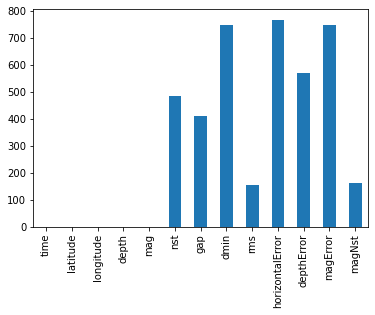

In [15]:
df[numerical].isnull().sum().plot.bar()
plt.show()

Terlihat bahwa missing value pada atribut **dmin**, **magError**, dan **horizontalError** mencapai 80%

Melihat missing value pada atribut bertipe kategorik

In [16]:
df[categorical].isnull().sum()

magType           0
net               0
id                0
updated           0
place             0
type              0
status            0
locationSource    0
magSource         0
dtype: int64

Terlihat bahwa tidak terdapat missing value pada atribut bertipe kategorik.

Melihat distribusi pada atribut numerik

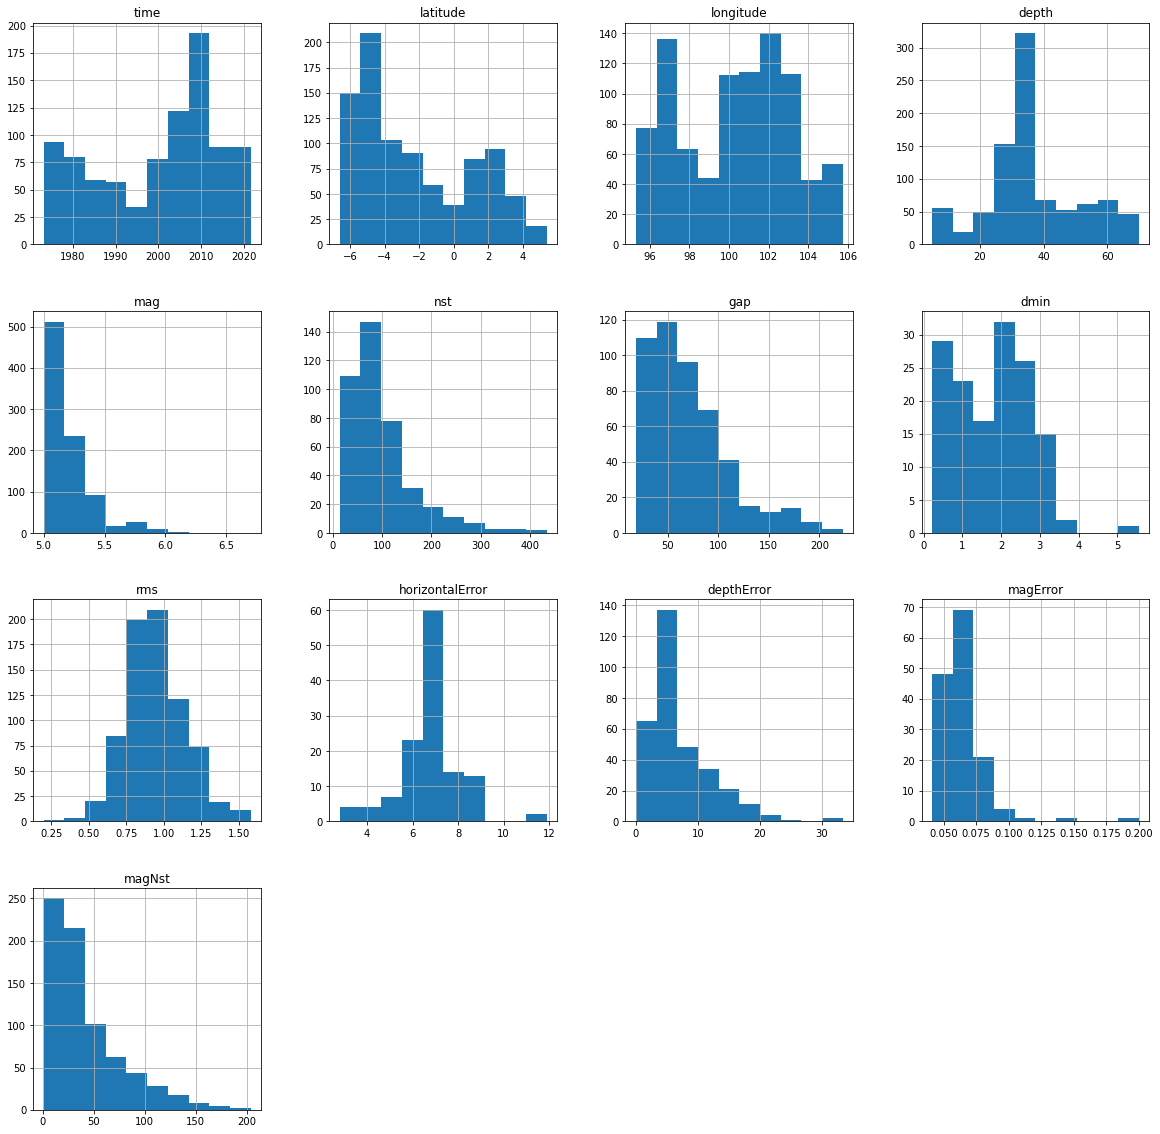

In [17]:
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

Berdasarkan histogram terlihat bahwa atribut **rms** dan **horizontalError** berdistribusi normal, sedangkan beberapa atribut memiliki skewness yang tinggi, yaitu atribut **mag**, **nst**, **gap**, **depthError**, **magError**, dan **magNst**.

Melihat statistik deskriptif dari atribut bertipe numerik

In [18]:
df[numerical].describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,895.000000,895.000000,895.000000,895.000000,409.000000,484.000000,145.000000,741.000000,127.00000,323.000000,145.000000,733.000000
mean,-2.218026,100.336492,36.598659,5.177765,98.960880,70.668388,1.778759,0.946964,6.78189,7.077090,0.063924,42.223738
std,3.247293,2.767184,14.122270,0.211174,68.195677,39.038384,0.981209,0.196881,1.30417,5.087468,0.017621,35.811157
min,-6.598000,95.298200,4.900000,5.000000,14.000000,18.500000,0.211000,0.200000,2.80000,0.000000,0.041000,1.000000
25%,-4.899500,97.490500,30.000000,5.000000,54.000000,41.000000,0.868000,0.800000,6.35000,3.900000,0.054000,17.000000
50%,-3.161500,100.722000,33.000000,5.100000,83.000000,62.100000,1.907000,0.930000,6.80000,5.400000,0.061000,30.000000
75%,0.964500,102.468000,44.975000,5.300000,121.000000,90.025000,2.469000,1.070000,7.30000,9.350000,0.069000,59.000000
max,5.375000,105.739000,70.000000,6.700000,434.000000,223.200000,5.562000,1.580000,11.90000,33.400000,0.200000,204.000000


Melihat statistik deskriptif dari atribut bertipe object

In [19]:
df[categorical].describe()

,magType,net,id,updated,place,type,status,locationSource,magSource
count,895,895,895,895,895,895,895,895,895
unique,1,1,895,876,895,1,1,1,1
top,mb,us,us6000f1ny,2015-05-13T18:53:53.000Z,"164 km SW of Sungai Penuh, Indonesia (1)",earthquake,reviewed,us,us
freq,895,895,1,6,1,895,895,895,895


## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut.

#### Mengecek duplikasi data

In [20]:
df.duplicated().sum()

0

Terlihat bahwa tidak terdapat duplikasi data.

#### Menangani Outlier

Mengecek statistik deskriptif dari data bertipe numerik

In [21]:
df[numerical].describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,895.000000,895.000000,895.000000,895.000000,409.000000,484.000000,145.000000,741.000000,127.00000,323.000000,145.000000,733.000000
mean,-2.218026,100.336492,36.598659,5.177765,98.960880,70.668388,1.778759,0.946964,6.78189,7.077090,0.063924,42.223738
std,3.247293,2.767184,14.122270,0.211174,68.195677,39.038384,0.981209,0.196881,1.30417,5.087468,0.017621,35.811157
min,-6.598000,95.298200,4.900000,5.000000,14.000000,18.500000,0.211000,0.200000,2.80000,0.000000,0.041000,1.000000
25%,-4.899500,97.490500,30.000000,5.000000,54.000000,41.000000,0.868000,0.800000,6.35000,3.900000,0.054000,17.000000
50%,-3.161500,100.722000,33.000000,5.100000,83.000000,62.100000,1.907000,0.930000,6.80000,5.400000,0.061000,30.000000
75%,0.964500,102.468000,44.975000,5.300000,121.000000,90.025000,2.469000,1.070000,7.30000,9.350000,0.069000,59.000000
max,5.375000,105.739000,70.000000,6.700000,434.000000,223.200000,5.562000,1.580000,11.90000,33.400000,0.200000,204.000000


Terlihat bahwa atribut memiliki rentang yang berbeda-beda

**Mengecek boxplot pada atribut numerik**

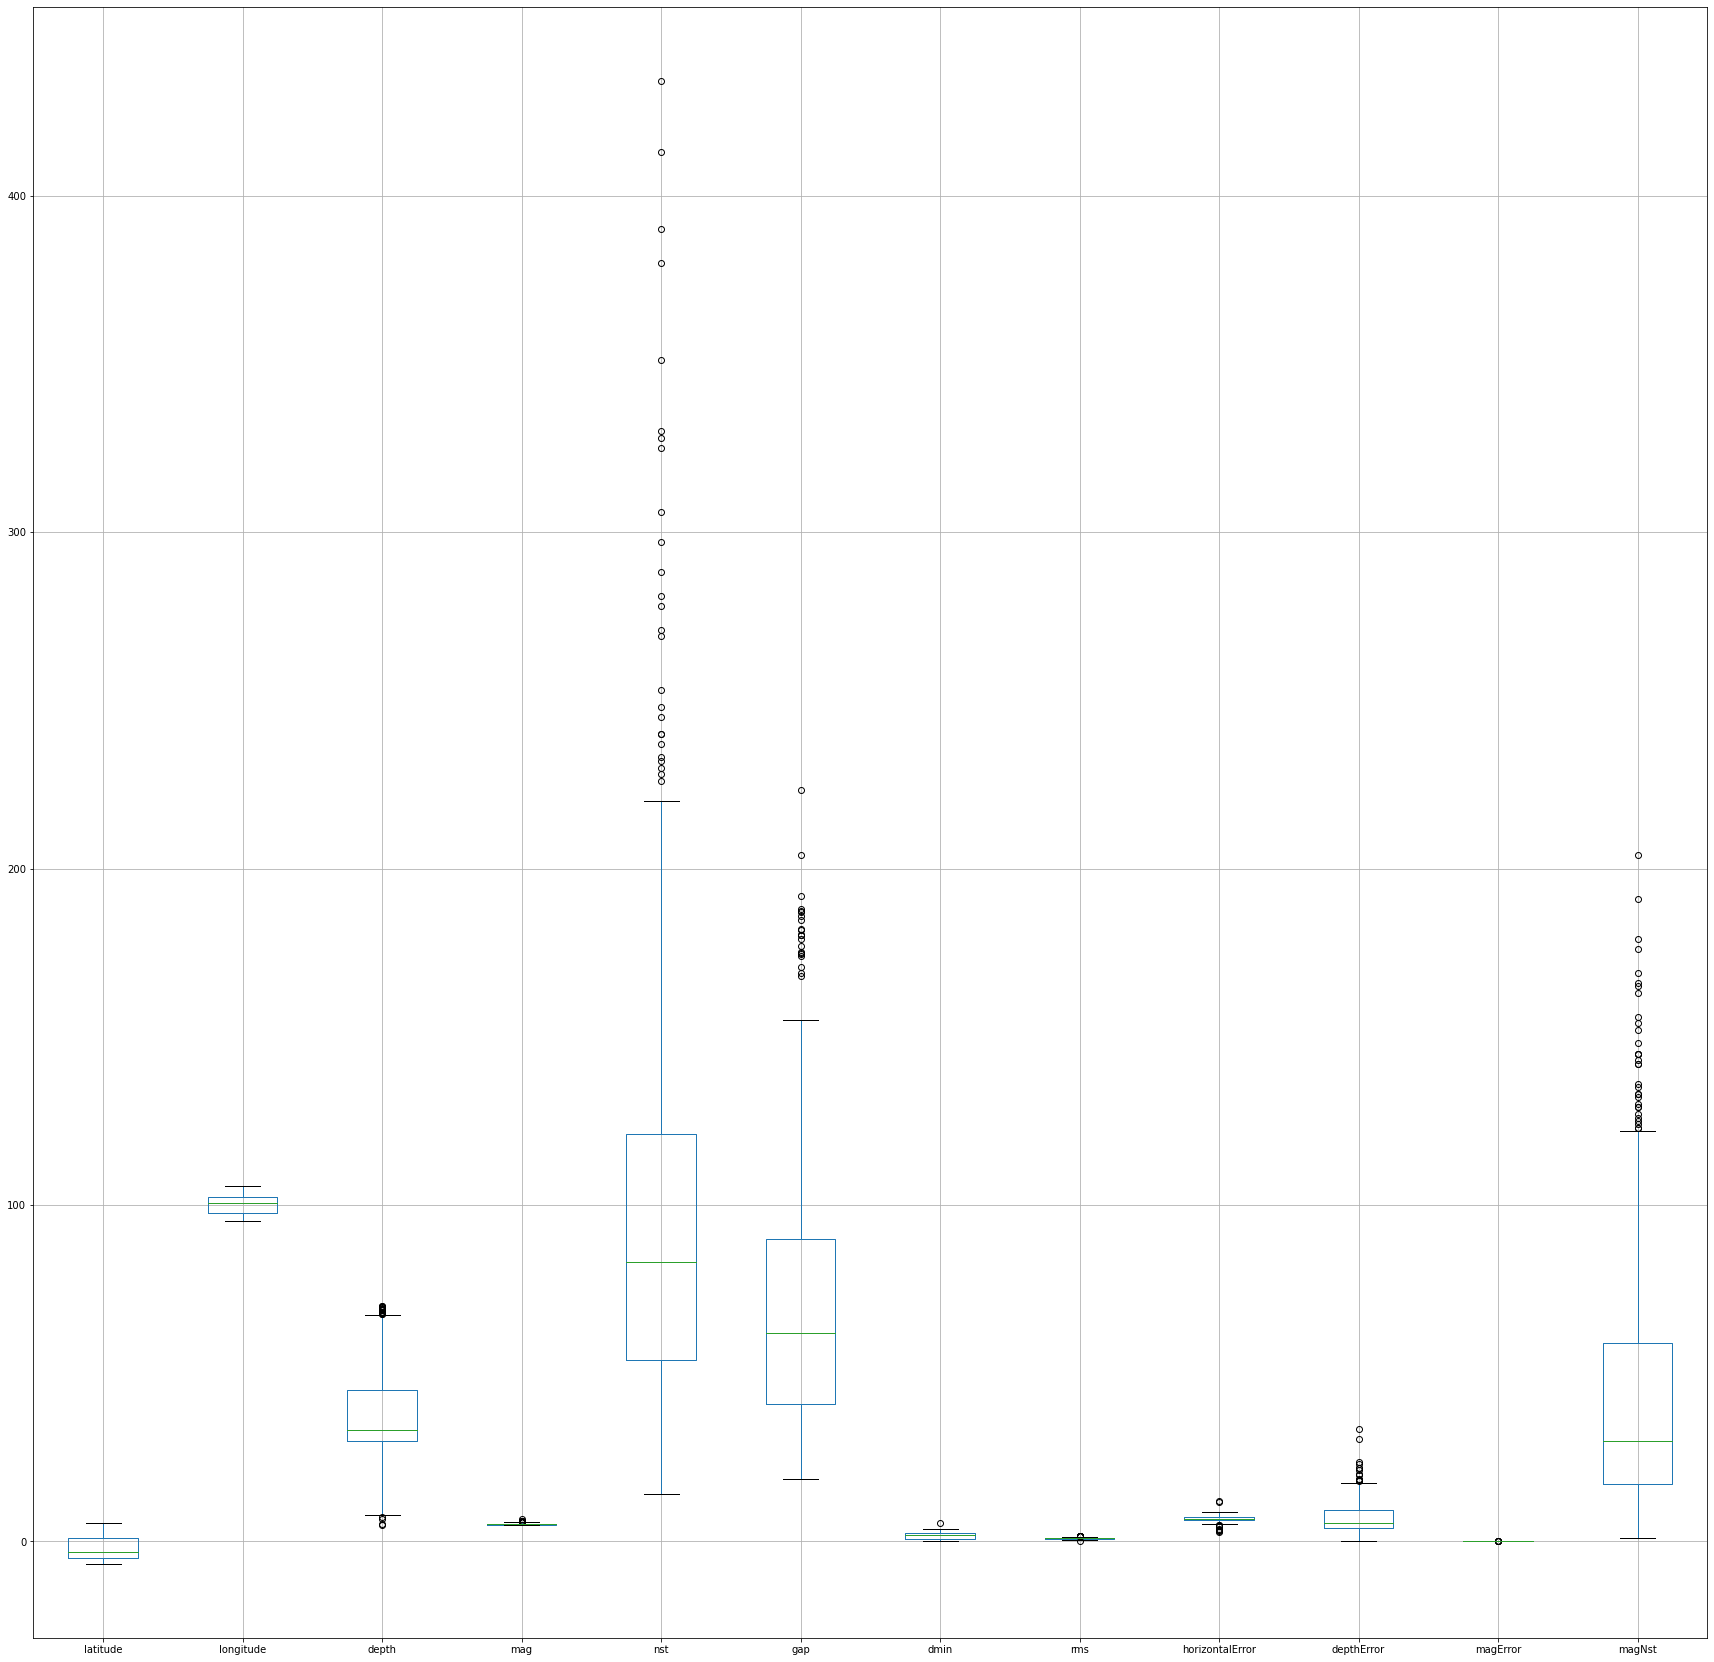

In [22]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

Boxplot menunjukkan outlier dalam jumlah banyak pada atribut **MinTemp**, **MaxTemp**, **Rainfall**, **Evaporation**, **WindGustSpeed**, **WindSpeed9am**, **WindSpeed3pm**, **Humidity9am**, **Pressure9am**, **Pressure3pm**, **Temp9am**, dan **Temp3pm**.

In [23]:
outlier = ['depth', 'mag', 'nst', 'gap', 'depthError','magNst']
print('outlier :',outlier)

outlier : ['depth', 'mag', 'nst', 'gap', 'depthError', 'magNst']


Mengatasi outlier dengan IQR

In [24]:
for feature in outlier:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

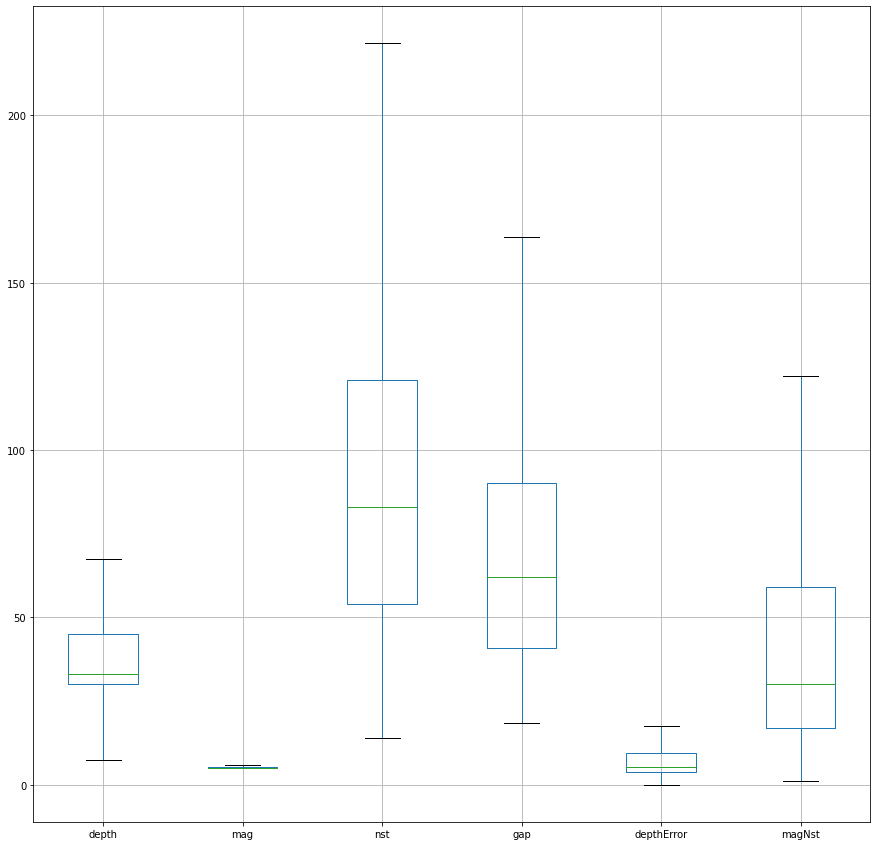

In [25]:
df[outlier].boxplot(figsize = (15,15))
plt.show()

Mengecek ulang statistik deskriptif

In [26]:
df[outlier].describe()

,depth,mag,nst,gap,depthError,magNst
count,895.000000,895.000000,409.000000,484.000000,323.000000,733.000000
mean,36.576802,5.173296,94.574572,69.800155,6.886842,41.151432
std,14.043696,0.194303,54.945059,36.585455,4.488845,32.636016
min,7.537500,5.000000,14.000000,18.500000,0.000000,1.000000
25%,30.000000,5.000000,54.000000,41.000000,3.900000,17.000000
50%,33.000000,5.100000,83.000000,62.100000,5.400000,30.000000
75%,44.975000,5.300000,121.000000,90.025000,9.350000,59.000000
max,67.437500,5.750000,221.500000,163.562500,17.525000,122.000000


#### Melakukan penanganan terhadap missing value

Menghapus kolom dengan missing value >11%

In [27]:
df2 = df.drop(['gap','nst','magNst','depthError','dmin','magError','horizontalError'], axis=1) 

In [28]:
print('banyak kolom :', len(df2.columns))
print('kolom :', df2.columns)

banyak kolom : 15
kolom : Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'rms',
       'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource',
       'magSource'],
      dtype='object')


Mengisi baris yang merupakan missing value 

- Atribut bertipe numeric yang terdapat missing value akan ditangani dengan imputasi median

Memperbarui list atribut bertipe numerik

In [29]:
#update numerical
numerical = [i for i in df2.columns if i not in categorical] 
numerical

['time', 'latitude', 'longitude', 'depth', 'mag', 'rms']

In [30]:
for num_col in numerical:
    df2[num_col].fillna(df2[num_col].median(),inplace=True)

In [31]:
df2[numerical].isnull().sum()

time         0
latitude     0
longitude    0
depth        0
mag          0
rms          0
dtype: int64

In [32]:
for cat_col in categorical:
    df2[cat_col].fillna(df2[cat_col].mode()[0],inplace=True)

In [33]:
df2.isnull().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
rms               0
net               0
id                0
updated           0
place             0
type              0
status            0
locationSource    0
magSource         0
dtype: int64

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   time            895 non-null    datetime64[ns, UTC]
 1   latitude        895 non-null    float64            
 2   longitude       895 non-null    float64            
 3   depth           895 non-null    float64            
 4   mag             895 non-null    float64            
 5   magType         895 non-null    object             
 6   rms             895 non-null    float64            
 7   net             895 non-null    object             
 8   id              895 non-null    object             
 9   updated         895 non-null    object             
 10  place           895 non-null    object             
 11  type            895 non-null    object             
 12  status          895 non-null    object             
 13  locationSource  895 non-null    obj

Dataset sudah tidak terdapat missing value

## Exploratory Data Analysis

### Descriptive Statistics & Query

Melihat statistik deskriptif pada data numerik

In [35]:
df2.describe()

,latitude,longitude,depth,mag,rms
count,895.000000,895.000000,895.000000,895.000000,895.000000
mean,-2.218026,100.336492,36.576802,5.173296,0.944045
std,3.247293,2.767184,14.043696,0.194303,0.179238
min,-6.598000,95.298200,7.537500,5.000000,0.200000
25%,-4.899500,97.490500,30.000000,5.000000,0.830000
50%,-3.161500,100.722000,33.000000,5.100000,0.930000
75%,0.964500,102.468000,44.975000,5.300000,1.030000
max,5.375000,105.739000,67.437500,5.750000,1.580000


Diperoleh bahwa:
- rata-rata depth/kedalaman yaitu 36.57 km
- rata-rata magnitudo yaitu 5.173 mb
- depth/kedalaman maksimal yaitu 67.4375 dan minimal 7.5375
- mag maksimal yaitu 5.75 dan minimal yaitu 5

Melihat statistik deskritif pada data kategorik

In [36]:
df2.describe(include="O")

,magType,net,id,updated,place,type,status,locationSource,magSource
count,895,895,895,895,895,895,895,895,895
unique,1,1,895,876,895,1,1,1,1
top,mb,us,us6000f1ny,2015-05-13T18:53:53.000Z,"164 km SW of Sungai Penuh, Indonesia (1)",earthquake,reviewed,us,us
freq,895,895,1,6,1,895,895,895,895


Diperoleh bahwa:


### Visualization

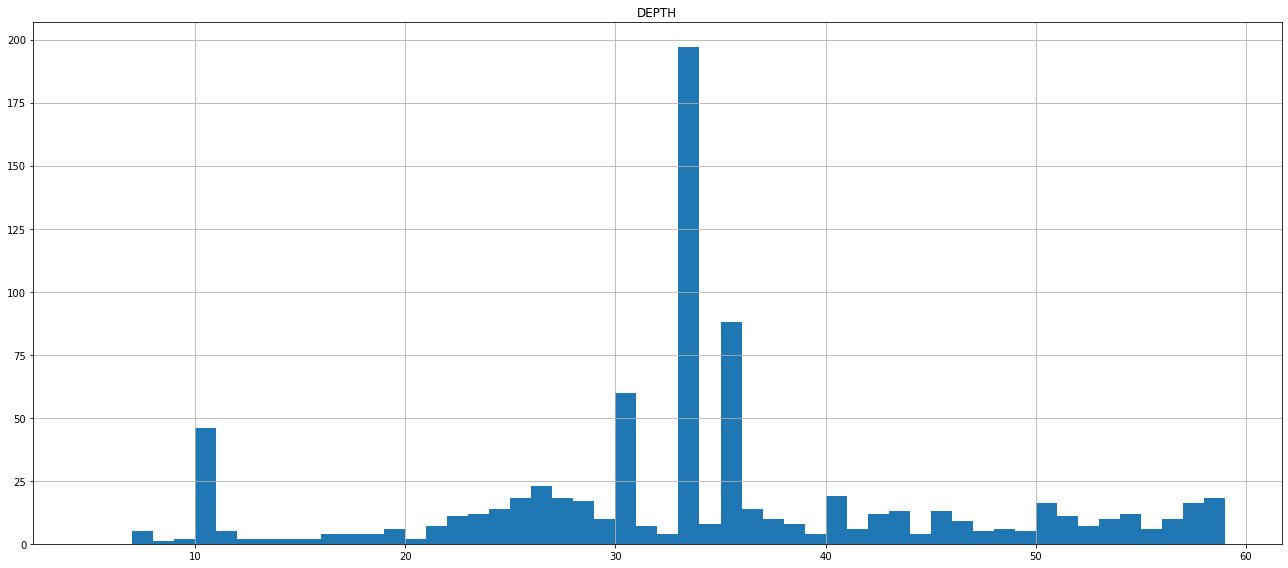

In [37]:
figure = plt.figure(figsize=(18,8))

df2["depth"].hist(bins=np.arange(5,60,1))
plt.title("DEPTH")
plt.tight_layout()

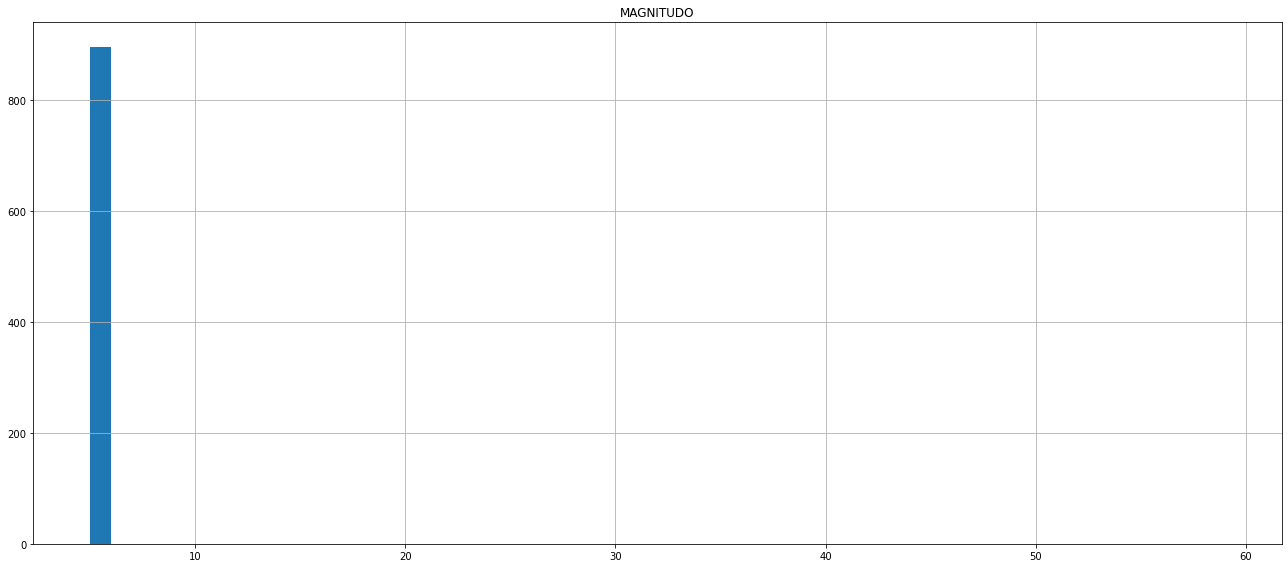

In [38]:
figure = plt.figure(figsize=(18,8))

df2["mag"].hist(bins=np.arange(5,60,1))
plt.title("MAGNITUDO")
plt.tight_layout()

### Correlation Matrix

In [39]:
df2.corr()

,latitude,longitude,depth,mag,rms
latitude,1.000000,-0.943494,-0.122477,-0.010519,-0.261302
longitude,-0.943494,1.000000,0.251025,0.027380,0.308558
depth,-0.122477,0.251025,1.000000,0.036252,0.083230
mag,-0.010519,0.027380,0.036252,1.000000,-0.006996
rms,-0.261302,0.308558,0.083230,-0.006996,1.000000


Melakukan visualisasi korelasi antar variabel untuk melihat hubungan

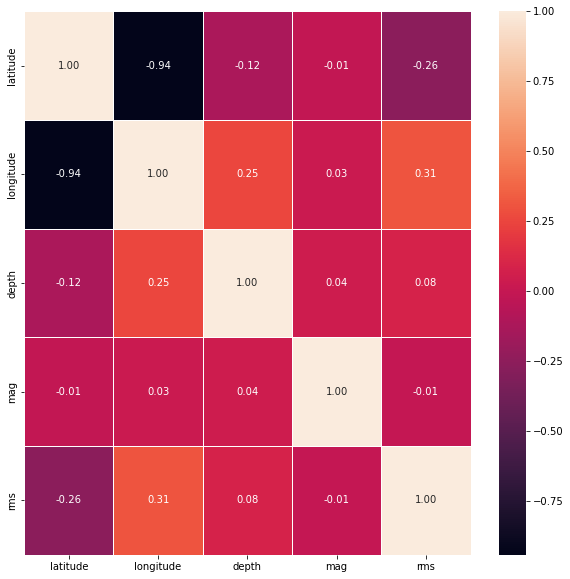

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
cm = sns.heatmap(df2.corr(), linewidths = .5, annot=True, fmt='.2f')

Terlihat bahwa terdapat korelasi yang tinggi (>0,8) diantara atribut **latitude** dan **longitude**, yang berarti atribut tsb merepresentasikan informasi yang sama. 

## Data Preprocessing

Memperbarui list atribut bertipe numerik dan kategorik

In [41]:
categorical = [i for i in df2.columns if df2[i].dtypes == 'O']
numerical = [i for i in df2.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['magType', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource']
numerical : ['time', 'latitude', 'longitude', 'depth', 'mag', 'rms']


## Feature Selection

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [42]:
df2.head()

,time,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,type,status,locationSource,magSource
0,2021-08-02 23:01:01.149000+00:00,-3.1615,100.4063,10.00,5.2,mb,0.87,us,us6000f1ny,2021-10-14T01:05:55.040Z,"164 km SW of Sungai Penuh, Indonesia (1)",earthquake,reviewed,us,us
1,2021-07-10 02:41:09.501000+00:00,1.8228,96.9785,17.35,5.4,mb,0.87,us,us6000etz0,2021-09-17T22:49:15.040Z,"98 km SE of Sinabang, Indonesia",earthquake,reviewed,us,us
2,2021-06-27 15:56:12.192000+00:00,-2.8938,101.0849,40.30,5.1,mb,0.62,us,us6000eq9y,2021-09-09T22:05:24.040Z,"98 km SSW of Sungai Penuh, Indonesia (1)",earthquake,reviewed,us,us
3,2021-06-19 21:12:15.554000+00:00,-4.5600,102.6323,56.20,5.2,mb,0.57,us,us7000eehm,2021-08-27T18:57:39.040Z,"90 km SW of Pagar Alam, Indonesia (1)",earthquake,reviewed,us,us
4,2021-06-15 14:16:14.774000+00:00,-4.2753,102.4086,61.49,5.2,mb,0.66,us,us7000ed89,2021-08-26T21:59:23.040Z,"54 km SSE of Bengkulu, Indonesia",earthquake,reviewed,us,us


In [43]:
X = df2[['depth','mag']]

In [44]:
X.head()

,depth,mag
0,10.00,5.2
1,17.35,5.4
2,40.30,5.1
3,56.20,5.2
4,61.49,5.2


In [45]:
X.shape

(895, 2)

Memiliki 895 baris dan 2 atribut.

## Feature Scaling

Melakukan scaling/standarisasi data menggunakan StandarScaler

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.89349455  0.1375112 ]
 [-1.36983541  1.16740678]
 [ 0.26526351 -0.37743659]
 ...
 [ 0.95635107  0.1375112 ]
 [ 2.19870565  2.71225015]
 [-0.25483331 -0.89238438]]


In [47]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df.head()

,depth,mag
0,-1.893495,0.137511
1,-1.369835,1.167407
2,0.265264,-0.377437
3,1.398077,0.137511
4,1.774969,0.137511


In [48]:
pd.DataFrame(X_scaled).describe()

,0,1
count,8.950000e+02,8.950000e+02
mean,-1.016257e-15,-3.692763e-15
std,1.000559e+00,1.000559e+00
min,-2.068938e+00,-8.923844e-01
25%,-4.685717e-01,-8.923844e-01
50%,-2.548333e-01,-3.774366e-01
75%,5.983392e-01,6.524590e-01
max,2.198706e+00,2.969724e+00


## Clustering

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

### Menentukan Jumlah Klaster Optimal menggunakan Metode Kurva Elbow

In [49]:
inertia = []

for i in range(1, 10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)
    
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 10)])
inertia_df

,Inertia
1,1790.000000
2,1156.598480
3,665.292150
4,512.850203
5,387.867177
6,298.590486
7,260.022091
8,227.817807
9,198.685781


Text(0, 0.5, 'Intertia')

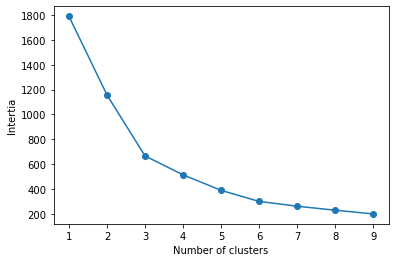

In [50]:
# fitting multiple k-means algorithms and storing the values in an empty list 
SSE = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure()
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')

Nilai inertia menunjukkan bahwa k kluster yang dapat dipilih yakni 3 kluster.

### K-Means

Metode clustering yang pertama adalah metode K-Means.

In [51]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(X_scaled)

KMeans(n_clusters=3)

In [52]:
Kmean.cluster_centers_

array([[ 1.39291526, -0.24744977],
       [-0.12572687,  1.54413174],
       [-0.52715919, -0.48579234]])

In [53]:
Kmean.inertia_

665.2423410329975

In [54]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
  kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
  kmeans.fit(X_scaled)
SSE.append(kmeans.inertia_)
print(SSE)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Hp\anaconda3\li

[80.30552278905549]


In [55]:
pred = Kmean.predict(X_scaled)

In [56]:
print(pred)

[2 1 2 0 0 0 2 2 0 0 2 2 2 2 0 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 0 2 0 2 2 2
 2 0 2 2 2 0 2 1 2 0 2 2 2 2 0 2 0 0 1 2 2 2 2 2 1 1 0 2 0 0 0 2 0 2 0 0 0
 0 0 2 0 0 0 0 1 2 0 2 1 2 0 2 1 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 2 1 2 1
 2 0 1 0 0 2 0 0 2 1 0 2 0 2 1 2 0 2 2 2 0 1 1 2 2 0 2 0 2 2 1 2 0 2 0 1 2
 2 2 2 0 2 0 0 2 2 0 2 2 1 0 0 0 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 0
 2 2 0 0 1 2 0 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 0 0 2 2 1 1 0 2 1 0 0 2 2 2
 2 2 1 2 2 1 2 0 0 2 2 2 2 0 2 0 2 2 2 1 2 2 2 2 1 0 2 0 2 2 2 2 2 2 2 0 0
 0 2 2 0 0 2 2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 1 2 2 1 1 1 2 2 2 2 2 2 0 2 2 0
 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2
 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 1 2 1 0 2 1 2 2 1 1 2 2 2 2 2 0 2 0 2
 2 1 0 2 2 2 2 0 2 2 2 2 1 2 0 2 1 2 2 1 2 2 2 0 0 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1 1 2 2
 2 2 1 2 2 1 2 1 1 2 1 2 1 2 2 2 2 2 1 1 1 2 2 1 1 1 2 2 1 0 1 1 1 0 2 2 2
 2 2 2 1 0 1 2 2 2 2 2 2 

In [57]:
frame = pd.DataFrame(X_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    499
0    206
1    190
Name: cluster, dtype: int64

In [58]:
labels = Kmean.labels_
X["cluster"] = labels

C:\Users\Hp\AppData\Local\Temp/ipykernel_54572/2418947831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["cluster"] = labels


In [59]:
X

,depth,mag,cluster
0,10.0000,5.20,2
1,17.3500,5.40,1
2,40.3000,5.10,2
3,56.2000,5.20,0
4,61.4900,5.20,0
...,...,...,...
890,51.0000,5.50,1
891,51.0000,5.75,1
892,50.0000,5.20,0
893,67.4375,5.70,1


In [60]:
df2[X["cluster"]==1]

,time,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,type,status,locationSource,magSource
1,2021-07-10 02:41:09.501000+00:00,1.8228,96.9785,17.3500,5.40,mb,0.87,us,us6000etz0,2021-09-17T22:49:15.040Z,"98 km SE of Sinabang, Indonesia",earthquake,reviewed,us,us
44,2019-02-02 11:01:38.730000+00:00,-2.7308,100.3019,10.0000,5.75,mb,0.67,us,us2000jcdi,2020-07-10T17:24:37.219Z,"142 km WSW of Sungai Penuh, Indonesia",earthquake,reviewed,us,us
55,2018-09-06 00:13:50.110000+00:00,0.8210,96.8947,10.0000,5.40,mb,0.60,us,us2000h922,2018-11-14T17:40:14.040Z,"190 km SSW of Singkil, Indonesia",earthquake,reviewed,us,us
61,2018-06-13 02:07:57.240000+00:00,-1.9281,98.6717,10.0000,5.40,mb,0.75,us,us1000epie,2018-09-07T17:47:01.040Z,"216 km WSW of Padang, Indonesia",earthquake,reviewed,us,us
62,2018-06-12 23:46:11.940000+00:00,-1.9469,98.6868,10.0000,5.60,mb,0.92,us,us1000epg0,2018-09-07T17:47:01.040Z,"215 km WSW of Padang, Indonesia",earthquake,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1974-02-11 01:40:46.200000+00:00,-6.1010,104.1080,33.0000,5.50,mb,0.93,us,usp0000594,2015-05-13T18:53:09.000Z,"147 km WSW of Bandar Lampung, Indonesia",earthquake,reviewed,us,us
887,1973-12-08 06:10:03.500000+00:00,-0.2450,98.3990,33.0000,5.70,mb,0.93,us,usp00004fs,2020-07-10T19:58:17.214Z,"195 km WNW of Pariaman, Indonesia (2)",earthquake,reviewed,us,us
890,1973-05-12 05:46:48.700000+00:00,-3.2430,101.2400,51.0000,5.50,mb,0.93,us,usp00001st,2020-07-10T19:34:25.049Z,"129 km WNW of Bengkulu, Indonesia",earthquake,reviewed,us,us
891,1973-05-04 23:56:06.100000+00:00,-1.4680,99.8510,51.0000,5.75,mb,0.93,us,usp00001q8,2015-05-13T18:53:08.000Z,"80 km SW of Padang, Indonesia",earthquake,reviewed,us,us


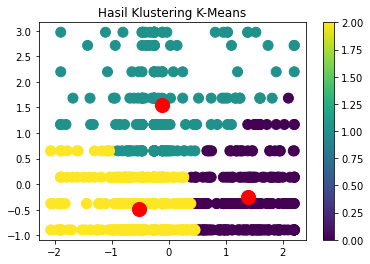

In [61]:
output = plt.scatter(X_scaled[:,0], X_scaled[:,1], s = 100, c = X.cluster, marker = 'o', alpha = 1, )
centers = Kmean.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()

### Melihat nilai rata-rata pada kolom berdasarkan klaster

In [62]:
cluster_centers = pd.DataFrame(data = Kmean.cluster_centers_, columns = [scaled_df.columns])
cluster_centers

,depth,mag
0,1.392915,-0.247450
1,-0.125727,1.544132
2,-0.527159,-0.485792


In [63]:
# Invers data yang telah distandarisasi untuk lebih memahami karaktersitik klaster
cluster_centers_inversed = scaler.inverse_transform(cluster_centers)
cluster_centers_inversed = pd.DataFrame(data = cluster_centers_inversed, columns = [scaled_df.columns])
cluster_centers_inversed

,depth,mag
0,56.127549,5.125243
1,34.812118,5.473158
2,29.177675,5.078958


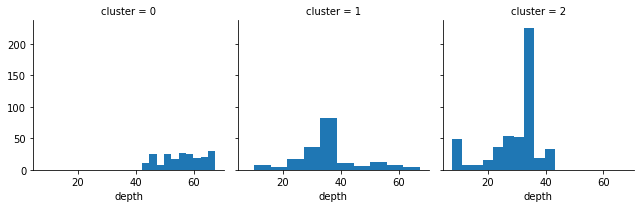

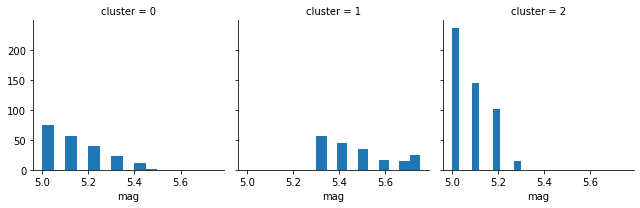

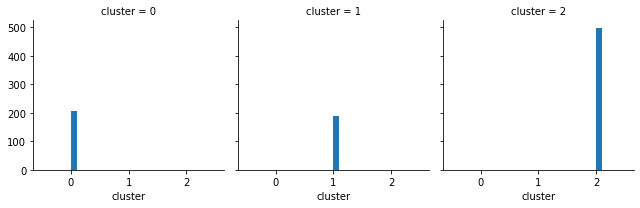

In [64]:
# Interpretasi klaster yang terbentuk
for c in X:
    grid= sns.FacetGrid(X, col='cluster')
    grid.map(plt.hist, c)

**Cluster 0 - Kedalaman gempa dalam, magnitudo sedang diantara cluster 1 dan 2**

Kedalaman gempa di atas 40, magnitudo di bawah 5.4

**Cluster 1 Kedalaman gempa sedang, magnitudo paling besar**

Kedalaman gempa diantara 10-70, magnitudo diantara 5.3-5.7

**Cluster 2 Kedalaman gempa dangkal, magnitudo paling kecil**

Kedalaman gempa di bawah 40, magnitudo di bawah 5.3

### SOM

Metode kedua menggunakan metode SOM. Metode ini digunakan sebagai pembanding metode K-Means

In [65]:
from minisom import MiniSom

In [66]:
X2 = df2.iloc[:,3:5]
X2.head()

,depth,mag
0,10.00,5.2
1,17.35,5.4
2,40.30,5.1
3,56.20,5.2
4,61.49,5.2


In [67]:
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
print(X2_scaled)

[[-1.89349455  0.1375112 ]
 [-1.36983541  1.16740678]
 [ 0.26526351 -0.37743659]
 ...
 [ 0.95635107  0.1375112 ]
 [ 2.19870565  2.71225015]
 [-0.25483331 -0.89238438]]


In [68]:
# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], X2.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(X2_scaled, 500, verbose=True)

 [ 330 / 500 ]  66% - 0:00:00 left  [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.8720909815075271


In [69]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X2_scaled]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

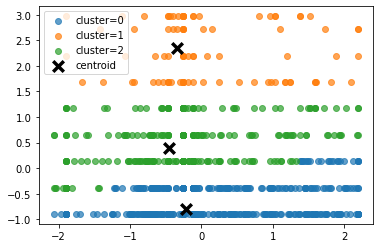

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(X2_scaled[cluster_index == c, 0],
                X2_scaled[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=6, linewidths=15, color='k', label='centroid')
plt.legend();

## Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih.

In [71]:
ss_k1 = silhouette_score(X_scaled, pred)
ch_k1 = calinski_harabasz_score(X_scaled, pred)
db_k1 = davies_bouldin_score(X_scaled, pred)

In [72]:
model_selection = pd.DataFrame({'KMeans': [ss_k1, ch_k1, db_k1]}, 
                               index = ['Silhouette Score', 'Calinski Harabasz', 'Davies-Bouldin'])
model_selection

,KMeans
Silhouette Score,0.458970
Calinski Harabasz,754.073944
Davies-Bouldin,0.788047


## Conclusions

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:


Dari hasil diatas, dapat ditarik kesimpulan bahwa 
1. Project ini menggunakan penerapan algoritma Unsupervised Learning, yaitu Clustering. Metode Clustering yang akan digunakan yaitu K-Means Clustering dan Self-Organizing Maps dan menghasilkan nilai evaluasi sihoutee paling baik oleh k-means clustering.
2. Data yang digunakan dalam analisis klaster ini adalah data gempa bumi di Pulau Sumatera dari tahun 1973-2021 sebanyak 895 data yang terdiri dari 22 atribut. 
3. Atribut yang digunakan adalah kedalaman gempa dan magnitudo.
4. Menghasilkan 3 klaster yaitu:
- Cluster 0 Kedalaman gempa dalam, magnitudo sedang diantara cluster 1 dan 2
- Cluster 1 Kedalaman gempa sedang, magnitudo paling besar
- Cluster 2 Kedalaman gempa dangkal, magnitudo paling kecil

In [73]:
pickle.dump(Kmean, open('modelfp4.pkl','wb'))

In [74]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('scaler4.pkl', 'wb') as file:
    pickle.dump(scaler, file)